# Deep Learning
# DL11 CNN

## <font color='blue'>**Redes convolucionales**</font>
<p style='text-align: justify;'>

Adaptado de https://torres.ai

![CNN](https://drive.google.com/uc?export=view&id=1Bu90nfULAiNqcgokdjMOIIktcSIOQ_Zr)


Una red neuronal convolucional (con las siglas CNNs o ConvNets) es un caso concreto de las redes neuronales Deep Learning, que ya se utilizaban a finales de los 90 pero que en los últimos años se han vuelto enormemente populares al lograr resultados muy impresionantes en el reconocimiento de imagen, impactando profundamente el área de la visión por computadora.

Las redes neuronales convolucionales son muy similares a las redes neuronales MLP: están formadas por neuronas que tienen parámetros en forma de pesos y sesgos que se pueden aprender. Pero una característica diferencial de la CNN es que asumen explícitamente que las entradas son imágenes, lo que nos permite codificar ciertas propiedades en la arquitectura para reconocer elementos específicos en las imágenes.

Para tener una idea intuitiva de cómo funcionan estas redes neuronales, pensemos en cómo reconocemos las cosas. Por ejemplo, si vemos un rostro, lo reconocemos porque tiene orejas, ojos, nariz, cabello, etc. Luego, para decidir si algo es un rostro, lo hacemos como si tuviéramos unas cajas mentales de verificación del características que estamos marcando. A veces una cara puede no tener oreja porque está cubierta de pelo, pero también la clasificamos con cierta probabilidad como cara porque vemos los ojos, la nariz y la boca. En realidad, podemos verlo como un clasificador equivalente al presentado en el post “Conceptos básicos de redes neuronales”, que predice una probabilidad de que la imagen de entrada sea un rostro o no.

Pero en realidad, primero debemos saber cómo es una oreja o una nariz para saber si están en una imagen; es decir, previamente debemos identificar líneas, aristas, texturas o formas que sean similares a las que contienen las orejas o narices que hemos visto antes. Y esto es lo que se confía a las capas de una red neuronal convolucional.

Pero identificar estos elementos no es suficiente para poder decir que algo es un rostro. También debemos ser capaces de identificar cómo se encuentran las partes de una cara, tamaños relativos, etc .; de lo contrario, la cara no se parecería a la que estamos acostumbrados. Visualmente, a menudo se presenta una idea intuitiva de lo que aprenden las capas con este ejemplo de un artículo del grupo de Andrew Ng.


https://dl.acm.org/citation.cfm?id=2001295

![CNN](https://drive.google.com/uc?export=view&id=1yZ390ySiIJEe85W2blShKTFIAHKefrPL)

La idea que queremos dar con este ejemplo visual es que, en realidad, en una red neuronal convolucional cada capa está aprendiendo diferentes niveles de abstracción. El lector puede imaginar que, con redes con muchas capas, es posible identificar estructuras más complejas en los datos de entrada.






## <font color='blue'>**Componentes de una red convolucional**</font>
<p style='text-align: justify;'>

### Capa convolucional

La diferencia fundamental entre una capa densamente conectada y una capa especializada en la operación de convolución, que llamaremos capa convolucional, es que la capa densa aprende patrones globales en su espacio de entrada global, mientras que las capas convolucionales aprenden patrones locales en ventanas pequeñas de dos dimensiones.

De manera intuitiva, podríamos decir que el propósito principal de una capa convolucional es detectar rasgos o rasgos visuales en imágenes como bordes, líneas, gotas de color, etc. Esta es una propiedad muy interesante porque, una vez que ha aprendido una característica en un punto específico de la imagen, puede reconocerlo posteriormente en cualquier parte de ella. En cambio, en una red neuronal densamente conectada, tiene que aprender el patrón nuevamente si aparece en una nueva ubicación de la imagen.

Otra característica importante es que las capas convolucionales pueden aprender jerarquías espaciales de patrones al preservar las relaciones espaciales. Por ejemplo, una primera capa convolucional puede aprender elementos básicos como bordes, y una segunda capa convolucional puede aprender patrones compuestos de elementos básicos aprendidos en la capa anterior. Y así sucesivamente hasta que aprenda patrones muy complejos. Esto permite que las redes neuronales convolucionales aprendan de manera eficiente conceptos visuales cada vez más complejos y abstractos.

En general, las capas de convoluciones operan sobre tensores 3D, llamados mapas de características, con dos ejes espaciales de altura y ancho, así como un eje de canal también llamado profundidad. Para una imagen en color RGB, la dimensión del eje de profundidad es 3, porque la imagen tiene tres canales: rojo, verde y azul. Para una imagen en blanco y negro, como los dígitos MNIST, la dimensión del eje de profundidad es 1 (nivel de gris).

En el caso de MNIST, como entrada a nuestra red neuronal podemos pensar en un espacio de neuronas bidimensionales 28 × 28 (altura = 28, ancho = 28, profundidad = 1). Una primera capa de neuronas ocultas conectadas a las neuronas de la capa de entrada que hemos comentado realizará las operaciones convolucionales que acabamos de describir. Pero como hemos explicado, no todas las neuronas de entrada están conectadas con todas las neuronas de este primer nivel de neuronas ocultas, como en el caso de las redes neuronales densamente conectadas; solo lo hacen pequeñas áreas localizadas del espacio de las neuronas de entrada que almacenan los píxeles de la imagen.



![Kernel](https://drive.google.com/uc?export=view&id=1zutkpElXXnlUyDT8pwnzuJsY2VKC1Z-U)

En el caso de nuestro ejemplo anterior, cada neurona de nuestra capa oculta se conectará a una pequeña región de 5 × 5 neuronas (es decir, 25 neuronas) de la capa de entrada (28 × 28). Intuitivamente, podemos pensar en una ventana de tamaño 5 × 5 que se desliza a lo largo de toda la capa de neuronas de entrada de 28 × 28 que contiene la imagen. Para cada posición de la ventana hay una neurona en la capa oculta que procesa esta información.





Visualmente, comenzamos con la ventana en la esquina superior izquierda de la imagen, y esta da la información necesaria a la primera neurona de la capa oculta. Luego, deslizamos la ventana una posición hacia la derecha para “conectar” las neuronas 5 × 5 de la capa de entrada incluida en esta ventana con la segunda neurona de la capa oculta. Y así, sucesivamente, recorremos todo el espacio de la capa de entrada, de izquierda a derecha y de arriba a abajo.

Analizando un poco el caso concreto que hemos propuesto, observamos que, si tenemos una entrada de 28 × 28 píxeles y una ventana de 5 × 5, esto define un espacio de 24 × 24 neuronas en la primera capa oculta porque podemos solo mueva la ventana 23 neuronas hacia la derecha y 23 neuronas hacia la parte inferior antes de tocar el borde derecho (o inferior) de la imagen de entrada.

![Kernel](https://drive.google.com/uc?export=view&id=127rjYBoaCPOixtA8LK7lnFH91CXD9j-M)

Nos gustaría señalar que la suposición que hemos hecho es que la ventana se mueve hacia adelante 1 píxel de distancia, tanto horizontal como verticalmente cuando comienza una nueva fila. Por tanto, en cada paso, la nueva ventana se superpone a la anterior excepto en esta línea de píxeles que hemos avanzado. Pero, como veremos en la siguiente sección, en las redes neuronales convolucionales, se pueden usar diferentes longitudes de ( el parámetro llamado **stride**)  avance . En las redes neuronales convolucionales también se puede aplicar una técnica de relleno de ceros alrededor del margen de la imagen para mejorar el barrido que se realiza con la ventana deslizante. El parámetro para definir esta técnica se llama “padding”, que también presentaremos con más detalle en el siguiente apartado, con el que podrás especificar el tamaño de este **padding**.



En nuestro caso de estudio, y siguiendo el formalismo presentado anteriormente, para “conectar” cada neurona de la capa oculta con las 25 neuronas correspondientes de la capa de entrada usaremos un valor de sesgo by una matriz de ponderaciones W de tamaño 5 × 5 que llamaremos filter (o kernel). El valor de cada punto de la capa oculta corresponde al producto escalar entre el filtro y el puñado de 25 neuronas (5 × 5) de la capa de entrada.

Sin embargo, lo particular y muy importante de las redes convolucionales es que usamos el mismo filtro (la misma matriz de pesos W y el mismo sesgo b) para todas las neuronas en la capa oculta: en nuestro caso para las neuronas 24 × 24 ( 576 neuronas en total) de la primera capa. El lector puede ver en este caso particular que este compartir reduce drásticamente la cantidad de parámetros que tendría una red neuronal si no lo hiciéramos: pasa de 14.400 parámetros que tendrían que ser ajustados (5 × 5 × 24 × 24) a 25 (5 × 5) parámetros más sesgos b.

Esta matriz W compartida junto con el sesgo b, que ya hemos dicho que llamamos filtro en este contexto de redes convolucionales, es similar a los filtros que utilizamos para retocar imágenes, que en nuestro caso se utilizan para buscar características locales en pequeños grupos de entradas. Recomiendo mirar los ejemplos que se encuentran en el manual del editor de imágenes de GIMP para tener una idea visual y muy intuitiva de cómo funciona un proceso de convolución.

Pero un filtro definido por una matriz W y un sesgo b solo permite detectar una característica específica en una imagen; por tanto, para realizar el reconocimiento de imágenes, se propone utilizar varios filtros a la vez, uno para cada característica que queramos detectar. Es por eso que una capa convolucional completa en una red neuronal convolucional incluye varios filtros.

![Kernel](https://drive.google.com/uc?export=view&id=16KAWN_9r06nSvWapTI6GfUZeob6OlFYY)



### La capa pooling

Además de las capas convolucionales que acabamos de describir, las redes neuronales convolucionales acompañan a la capa convolucional con capas agrupadas, que generalmente se aplican inmediatamente después de las capas convolucionales. Un primer enfoque para comprender para qué sirven estas capas es ver que las capas de agrupación simplifican la información recopilada por la capa convolucional y crean una versión condensada de la información contenida en ellas.

En nuestro ejemplo de MNIST, vamos a elegir una ventana de 2 × 2 de la capa convolucional y vamos a sintetizar la información en un punto de la capa de agrupación. Visualmente, se puede expresar de la siguiente manera:

![Kernel](https://drive.google.com/uc?export=view&id=15YOR_cHVCqMEgayj9FvtiTesxZN_2UDr)


Hay varias formas de condensar la información, pero una habitual, que usaremos en nuestro ejemplo, se conoce como max-pooling, que como valor mantiene el valor máximo de los que estaban en la ventana de entrada 2 × 2 en nuestro caso. En este caso dividimos por 4 el tamaño de la salida de la capa de pooling, dejando una imagen de 12 × 12.

La combinación de promedios también se puede usar en lugar de la combinación máxima, donde cada grupo de puntos de entrada se transforma en el valor promedio del grupo de puntos en lugar de su valor máximo. Pero, en general, la agrupación máxima tiende a funcionar mejor que las soluciones alternativas.

Es interesante notar que con la transformación del pooling mantenemos la relación espacial. Para verlo visualmente, tomemos el siguiente ejemplo de una matriz de 12 × 12 donde hemos representado un “7” (Imaginemos que los píxeles por donde pasamos contienen 1 y el resto 0; no lo hemos agregado al dibujo para simplificar eso). Si aplicamos una operación de max-pooling con una ventana de 2 × 2 (la representamos en la matriz central que divide el espacio en un mosaico con regiones del tamaño de la ventana), obtenemos una matriz de 6 × 6 donde una representación equivalente de 7 se mantiene (en la figura de la derecha donde se marcan los ceros en blanco y los puntos con valor 1 en negro):

![Kernel](https://drive.google.com/uc?export=view&id=1dMuXertc3eJSdjltQJOEbXUDSLWzhQct)




### Un ejemplo

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0


Definamos una red neuronal de una capa convolucional y un MaxPooling2D

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
Total params: 832 (3.25 KB)
Trainable params: 832 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Vamos poniendo mas bloques de lo mismo.

In [ ]:
model = Sequential()
# Aplicamos una convolución de 32 filtros de 5x5
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
# Aplicamos una convolución de 64 filtros de 5x5
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
Total params: 52096 (203.50 KB)
Trainable params: 52096 (203.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Lo convertimos a un gran vector plano
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)               

Una salida densa al final para ajustar probabilidades o clasificadores

Nuestro dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
# Normalizamos la data entre 0 y 1. Como on valores de escala de grises,
# lo dividimos por 255
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#### Un primer modelo.

Dos bloques, 5 epochs.

In [ ]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Compilando nuestro modelo

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 18s 3ms/step - loss: 0.8608 - accuracy: 0.6970
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5233 - accuracy: 0.8113
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4576 - accuracy: 0.8375
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4206 - accuracy: 0.8507
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8503
Test accuracy: 0.8503000140190125


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Volvemos las imagenes a formato original para hacer el plot

In [ ]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))
test_images.shape

(10000, 28, 28)

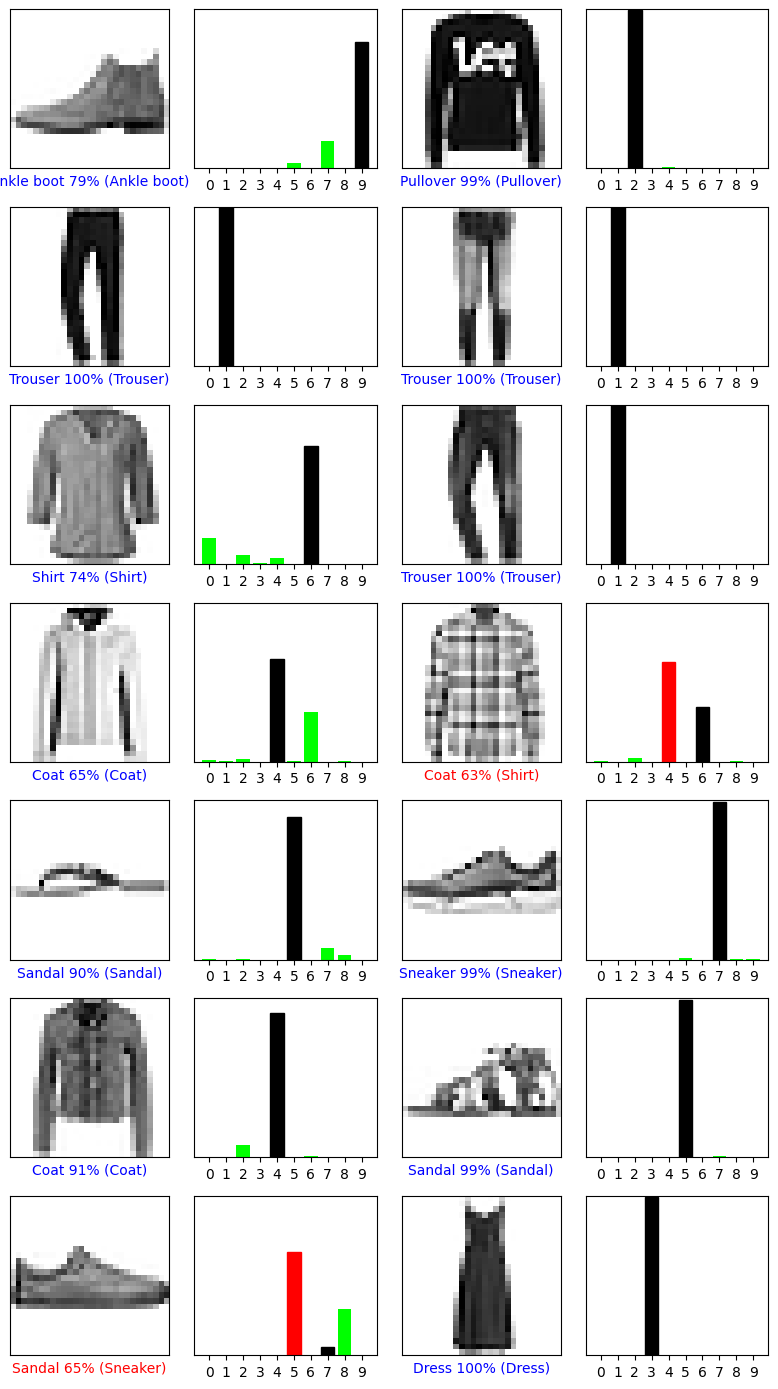

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## <font color="green">**Actividad 1**</font>

__Modelo 2__: Duplicando las neuronas de modelo base y añadiendo una capa densa de 64 neuronas

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

<font color='green'>Fin Actividad 1</font>

## <font color="green">**Actividad 2**</font>

__Modelo 3__: cambiar al optimizador `adam`

<font color='green'>Fin Actividad 2</font>

## <font color="green">**Actividad 3**</font>

__Modelo 4__: Buscando un modelo más complejo que usa capas `BathNormalization` y `Dropout`.

<font color='green'>Fin Actividad 3</font>

## <font color="green">**Actividad 4**</font>

__Modelo 5__: Modelo anterior añadiendo más epochs (10 epochs)

<font color='green'>Fin Actividad 4</font>

## <font color="green">**Actividad 5**</font>

__Modelo 6__. Modelo anterior añadiendo más epochs (30 epochs) y diferentes hiperparámetros al optimizador `adam`.

<font color='green'>Fin Actividad 5</font>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='red'>**Autoencoders para Compresión de Imágenes.**</font>

Los autoencoders son una categoría especial de redes neuronales utilizadas para la codificación automática de datos, es decir, representar datos en un espacio de dimensiones reducidas. Uno de los usos más comunes de los autoencoders en el ámbito de las imágenes es para la compresión de imágenes.

En este ejercicio, se le desafía a crear un autoencoder para imágenes que realice lo siguiente:

1. Utilice el conjunto de datos Fashion MNIST que consta de imágenes de ropa en escala de grises de 28x28 píxeles.

2. Divida el conjunto de datos en entrenamiento y prueba.

3. Diseñe un autoencoder con la siguiente estructura:

a. Capa de entrada con la forma de las imágenes (28x28).

b. Capas convolucionales que reduzcan las dimensiones de las imágenes.

c. Capas de "Max Pooling" para reducir aún más las dimensiones.

d. Capas de "UpSampling" y convolucionales para reconstruir las imágenes desde la representación codificada.

4. Entrene el autoencoder usando el conjunto de entrenamiento.

5. Evalúe el autoencoder utilizando el conjunto de prueba: tome algunas imágenes, páselas por el autoencoder y compare las imágenes originales con las reconstrucciones.

6. Visualice y compare las imágenes originales y las imágenes reconstruidas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# 1. Carga y preparación de datos
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 2. Diseño del autoencoder
input_img = Input(shape=(28, 28, 1))

# Capa de codificación
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Capa de decodificación
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# 3. Entrenamiento del autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# 4. Evaluación
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Cuántas imágenes queremos mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
